In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)

In [3]:
print("shape of data : ", fashion_mnist['data'].shape)
print("shape of target : ", fashion_mnist['target'].shape)

shape of data :  (70000, 784)
shape of target :  (70000,)


In [4]:
X = fashion_mnist['data'].to_numpy()
Y = fashion_mnist['target'].to_numpy()

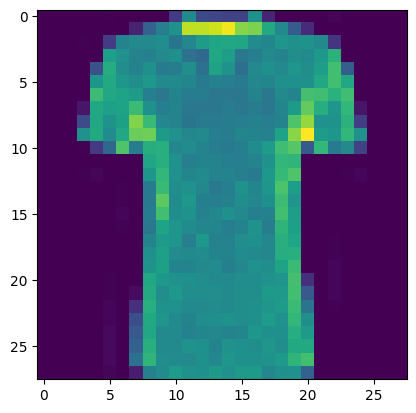

In [5]:
random_index = np.random.randint(0, len(Y))
plt.imshow(X[random_index].reshape(28, 28))
plt.show()

In [6]:
standard_X = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)

In [7]:
sample_covariance_matrix = (1/len(Y))*np.matmul(standard_X.T, standard_X)

In [8]:
print(np.allclose(sample_covariance_matrix, np.cov(standard_X.T, ddof=0)))

True


In [9]:
eigen_vals, eigen_vecs = np.linalg.eig(sample_covariance_matrix)
print("eigen values : ", eigen_vals.shape)
print("eigen vectors : ", eigen_vecs.shape)

eigen values :  (784,)
eigen vectors :  (784, 784)


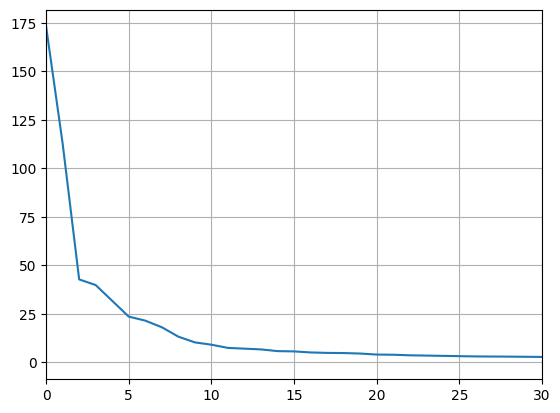

In [10]:
sorted_eigen_values = sorted(eigen_vals, reverse=True)
plt.plot(sorted_eigen_values)
plt.grid()
plt.xlim([0, 30])
plt.show()

In [11]:
U = eigen_vecs[0:25].T
U.shape

(784, 25)

In [12]:
X_PCA = np.matmul(U.T, standard_X.T)

In [13]:
X_PCA.shape

(25, 70000)

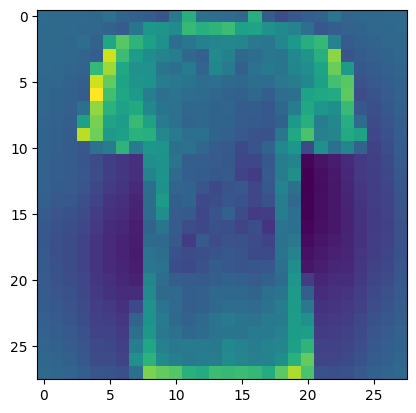

In [14]:
plt.imshow(standard_X[random_index].reshape(28, 28))

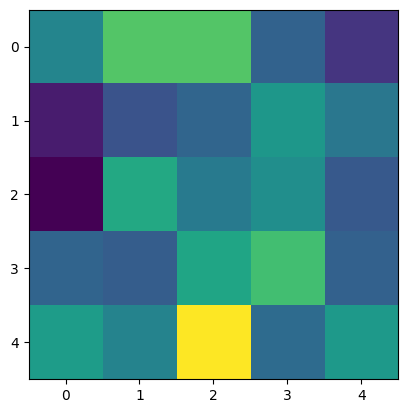

In [15]:
plt.imshow(X_PCA.T[random_index].reshape(5, 5))
plt.show()